 # WATER POTABILITY PREDICTION MODEL

The dataset used for this model was gotten from ...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('Datasets/water_potability.csv')

In [5]:
df.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [6]:
df.shape

(3276, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(2011, 10)

In [11]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [14]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [15]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


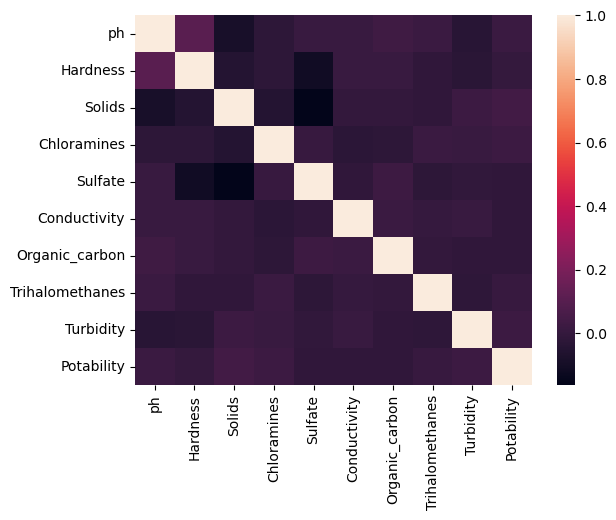

In [17]:
sns.heatmap(df.corr());

In [19]:
X = df.drop(columns=['Potability'])

In [20]:
y = df['Potability']

In [21]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


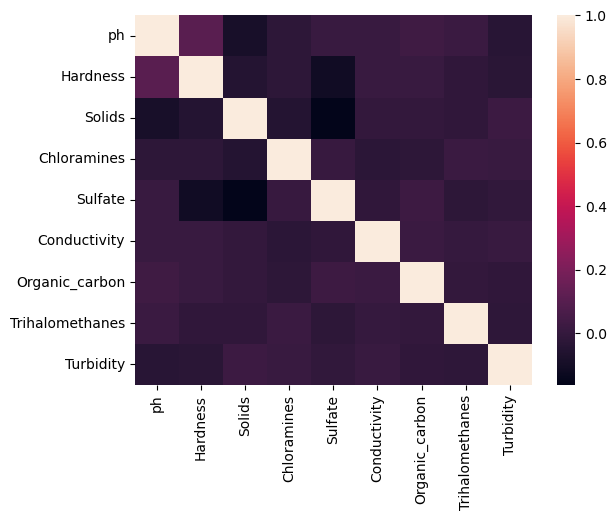

In [22]:
sns.heatmap(X.corr());

In [23]:
y.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state = 123)

In [26]:
X_train.shape

(1608, 9)

In [27]:
y_train.shape

(1608,)

In [28]:
X_val.shape

(403, 9)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [30]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

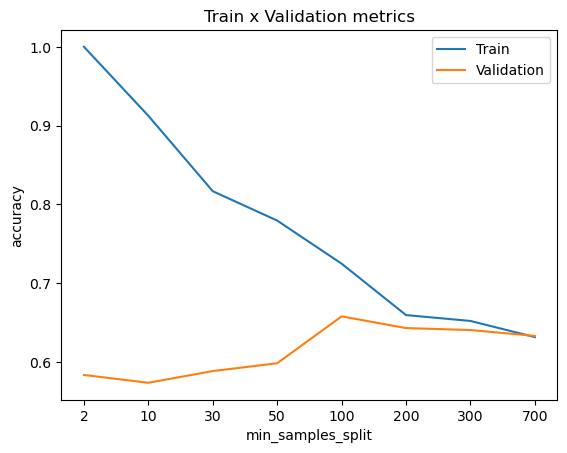

In [31]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [32]:
accuracy_list_train

[1.0,
 0.9123134328358209,
 0.8165422885572139,
 0.779228855721393,
 0.724502487562189,
 0.6592039800995025,
 0.6517412935323383,
 0.6312189054726368]

In [33]:
accuracy_list_val

[0.5831265508684863,
 0.5732009925558312,
 0.5880893300248139,
 0.598014888337469,
 0.6575682382133995,
 0.6426799007444168,
 0.6401985111662531,
 0.6327543424317618]

In [34]:
f1_list_train

[1.0,
 0.8922841864018335,
 0.7763457164518576,
 0.7271329746348961,
 0.6424535916061339,
 0.5500821018062397,
 0.5309882747068676,
 0.46528403967538323]

In [35]:
f1_list_val

[0.47500000000000003,
 0.46249999999999997,
 0.4779874213836478,
 0.4635761589403974,
 0.5106382978723404,
 0.4820143884892086,
 0.4727272727272728,
 0.421875]

In [36]:
y_val.value_counts()

0    257
1    146
Name: Potability, dtype: int64

In [39]:
min_samples_split_list = np.arange(50,210,10)

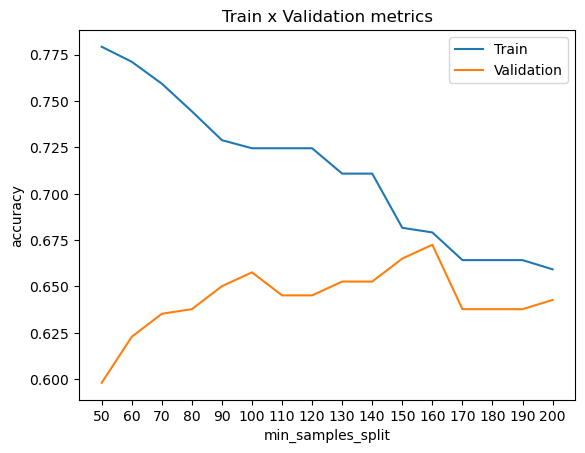

In [40]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [41]:
accuracy_list_train

[0.779228855721393,
 0.7711442786069652,
 0.7593283582089553,
 0.7444029850746269,
 0.7288557213930348,
 0.724502487562189,
 0.724502487562189,
 0.724502487562189,
 0.710820895522388,
 0.710820895522388,
 0.681592039800995,
 0.6791044776119403,
 0.664179104477612,
 0.664179104477612,
 0.664179104477612,
 0.6592039800995025]

In [42]:
accuracy_list_val

[0.598014888337469,
 0.6228287841191067,
 0.6352357320099256,
 0.6377171215880894,
 0.6501240694789082,
 0.6575682382133995,
 0.6451612903225806,
 0.6451612903225806,
 0.652605459057072,
 0.652605459057072,
 0.6650124069478908,
 0.6724565756823822,
 0.6377171215880894,
 0.6377171215880894,
 0.6377171215880894,
 0.6426799007444168]

In [43]:
f1_list_train

[0.7271329746348961,
 0.7093206951026856,
 0.6931007137192703,
 0.6786551993745112,
 0.6528662420382166,
 0.6424535916061339,
 0.6464485235434957,
 0.6464485235434957,
 0.6089150546677881,
 0.6089150546677881,
 0.5638841567291313,
 0.5597269624573379,
 0.5609756097560976,
 0.5609756097560976,
 0.5609756097560976,
 0.5500821018062397]

In [44]:
f1_list_val

[0.4635761589403974,
 0.47586206896551725,
 0.480565371024735,
 0.496551724137931,
 0.5087108013937283,
 0.5106382978723404,
 0.5017421602787456,
 0.5017421602787456,
 0.4852941176470588,
 0.4852941176470588,
 0.4981412639405204,
 0.5074626865671642,
 0.4859154929577465,
 0.4859154929577465,
 0.4859154929577465,
 0.4820143884892086]

In [45]:
min_samples_split_list = np.arange(150,171)

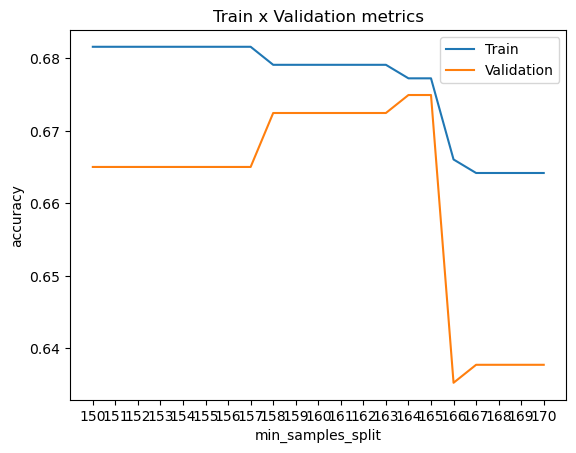

In [46]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [47]:
accuracy_list_train

[0.681592039800995,
 0.681592039800995,
 0.681592039800995,
 0.681592039800995,
 0.681592039800995,
 0.681592039800995,
 0.681592039800995,
 0.681592039800995,
 0.6791044776119403,
 0.6791044776119403,
 0.6791044776119403,
 0.6791044776119403,
 0.6791044776119403,
 0.6791044776119403,
 0.6772388059701493,
 0.6772388059701493,
 0.6660447761194029,
 0.664179104477612,
 0.664179104477612,
 0.664179104477612,
 0.664179104477612]

In [48]:
accuracy_list_val

[0.6650124069478908,
 0.6650124069478908,
 0.6650124069478908,
 0.6650124069478908,
 0.6650124069478908,
 0.6650124069478908,
 0.6650124069478908,
 0.6650124069478908,
 0.6724565756823822,
 0.6724565756823822,
 0.6724565756823822,
 0.6724565756823822,
 0.6724565756823822,
 0.6724565756823822,
 0.674937965260546,
 0.674937965260546,
 0.6352357320099256,
 0.6377171215880894,
 0.6377171215880894,
 0.6377171215880894,
 0.6377171215880894]

In [49]:
f1_list_train

[0.5638841567291313,
 0.5638841567291313,
 0.5638841567291313,
 0.5638841567291313,
 0.5638841567291313,
 0.5638841567291313,
 0.5638841567291313,
 0.5638841567291313,
 0.5597269624573379,
 0.5597269624573379,
 0.5597269624573379,
 0.5597269624573379,
 0.5597269624573379,
 0.5597269624573379,
 0.5552699228791773,
 0.5552699228791773,
 0.5714285714285715,
 0.5609756097560976,
 0.5609756097560976,
 0.5609756097560976,
 0.5609756097560976]

In [50]:
f1_list_val

[0.4981412639405204,
 0.4981412639405204,
 0.4981412639405204,
 0.4981412639405204,
 0.4981412639405204,
 0.4981412639405204,
 0.4981412639405204,
 0.4981412639405204,
 0.5074626865671642,
 0.5074626865671642,
 0.5074626865671642,
 0.5074626865671642,
 0.5074626865671642,
 0.5074626865671642,
 0.5019011406844106,
 0.5019011406844106,
 0.4878048780487805,
 0.4859154929577465,
 0.4859154929577465,
 0.4859154929577465,
 0.4859154929577465]

In [51]:
min_samples_split_list = np.arange(160,171)

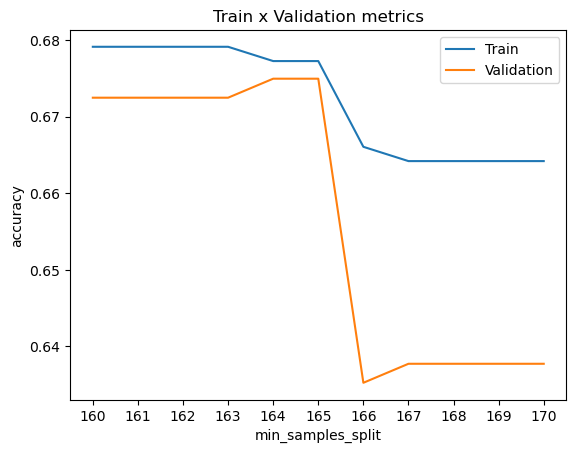

In [52]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [53]:
accuracy_list_train

[0.6791044776119403,
 0.6791044776119403,
 0.6791044776119403,
 0.6791044776119403,
 0.6772388059701493,
 0.6772388059701493,
 0.6660447761194029,
 0.664179104477612,
 0.664179104477612,
 0.664179104477612,
 0.664179104477612]

In [54]:
accuracy_list_val

[0.6724565756823822,
 0.6724565756823822,
 0.6724565756823822,
 0.6724565756823822,
 0.674937965260546,
 0.674937965260546,
 0.6352357320099256,
 0.6377171215880894,
 0.6377171215880894,
 0.6377171215880894,
 0.6377171215880894]

In [55]:
f1_list_train

[0.5597269624573379,
 0.5597269624573379,
 0.5597269624573379,
 0.5597269624573379,
 0.5552699228791773,
 0.5552699228791773,
 0.5714285714285715,
 0.5609756097560976,
 0.5609756097560976,
 0.5609756097560976,
 0.5609756097560976]

In [56]:
f1_list_val

[0.5074626865671642,
 0.5074626865671642,
 0.5074626865671642,
 0.5074626865671642,
 0.5019011406844106,
 0.5019011406844106,
 0.4878048780487805,
 0.4859154929577465,
 0.4859154929577465,
 0.4859154929577465,
 0.4859154929577465]

In [57]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

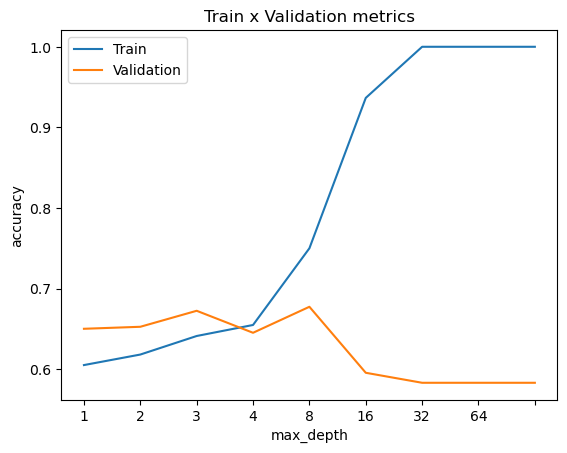

In [58]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [59]:
accuracy_list_train

[0.6050995024875622,
 0.6181592039800995,
 0.6411691542288557,
 0.6548507462686567,
 0.75,
 0.9365671641791045,
 1.0,
 1.0,
 1.0]

In [60]:
f1_list_train

[0.12654745529573588,
 0.2810304449648712,
 0.2742138364779874,
 0.4200626959247649,
 0.6127167630057804,
 0.919811320754717,
 1.0,
 1.0,
 1.0]

In [61]:
accuracy_list_val

[0.6501240694789082,
 0.652605459057072,
 0.6724565756823822,
 0.6451612903225806,
 0.6774193548387096,
 0.5955334987593052,
 0.5831265508684863,
 0.5831265508684863,
 0.5831265508684863]

In [62]:
f1_list_val

[0.12422360248447206,
 0.27835051546391754,
 0.2747252747252747,
 0.3470319634703196,
 0.4444444444444445,
 0.4511784511784512,
 0.47500000000000003,
 0.47500000000000003,
 0.47500000000000003]

In [63]:
max_depth_list = np.arange(2,17)

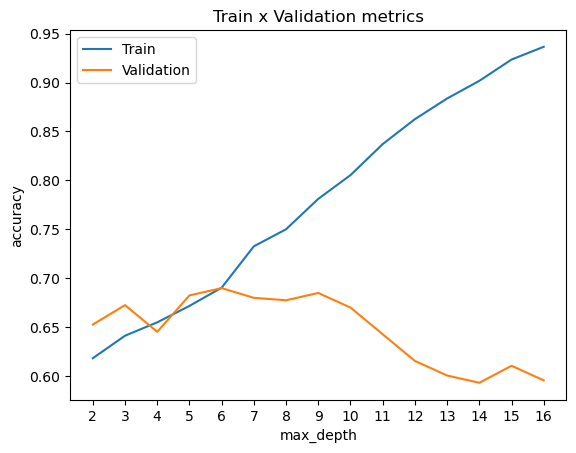

In [64]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

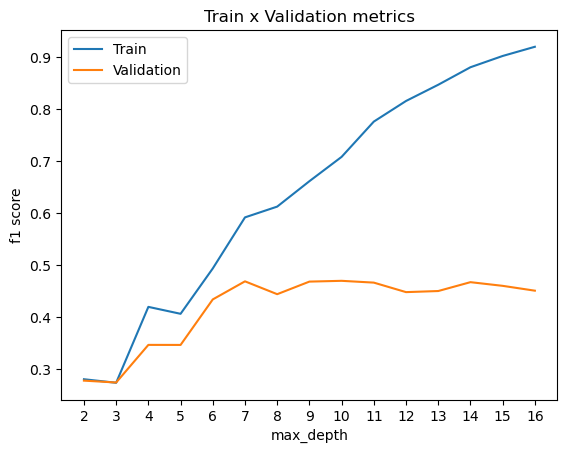

In [69]:
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('f1 score')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Validation']);

In [70]:
accuracy_list_train

[0.6181592039800995,
 0.6411691542288557,
 0.6548507462686567,
 0.6716417910447762,
 0.6902985074626866,
 0.7325870646766169,
 0.75,
 0.7810945273631841,
 0.8053482587064676,
 0.8370646766169154,
 0.8625621890547264,
 0.8837064676616916,
 0.9017412935323383,
 0.9235074626865671,
 0.9365671641791045]

In [71]:
f1_list_train

[0.2810304449648712,
 0.2742138364779874,
 0.4200626959247649,
 0.40674157303370784,
 0.49390243902439024,
 0.5920303605313093,
 0.6127167630057804,
 0.6615384615384616,
 0.7082945013979497,
 0.7760683760683762,
 0.8156797331109257,
 0.8468468468468467,
 0.8804841149773072,
 0.9021479713603819,
 0.919811320754717]

In [72]:
accuracy_list_val

[0.652605459057072,
 0.6724565756823822,
 0.6451612903225806,
 0.6823821339950372,
 0.6898263027295285,
 0.6799007444168734,
 0.6774193548387096,
 0.684863523573201,
 0.6699751861042184,
 0.6426799007444168,
 0.6153846153846154,
 0.6004962779156328,
 0.5930521091811415,
 0.6104218362282878,
 0.5955334987593052]

In [73]:
f1_list_val

[0.27835051546391754,
 0.2747252747252747,
 0.3470319634703196,
 0.3469387755102041,
 0.43438914027149317,
 0.46913580246913583,
 0.4444444444444445,
 0.4686192468619247,
 0.47011952191235057,
 0.4666666666666667,
 0.4483985765124555,
 0.4505119453924915,
 0.4675324675324675,
 0.46048109965635736,
 0.4511784511784512]

    Chosen max_depth = 7
    Chosen min_samples_split = 165

In [98]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 165,
                                             max_depth = 7,
                                             random_state = 123).fit(X_train,y_train)

In [99]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Accuracy for validation:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")
print(f"f1 for validation:\n\tf1 score: {f1_score(decision_tree_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 0.6629
f1 for train:
	f1 score: 0.5108
Accuracy for validation:
	Accuracy score: 0.6799
f1 for validation:
	f1 score: 0.4861


In [100]:
decision_tree_model.feature_importances_

array([0.26937369, 0.14743172, 0.03679229, 0.        , 0.5464023 ,
       0.        , 0.        , 0.        , 0.        ])

In [101]:
decision_tree_model.feature_names_in_

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype=object)

In [102]:
decision_tree_model.get_depth()

7

In [103]:
decision_tree_model.get_n_leaves()

11

In [104]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 165,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

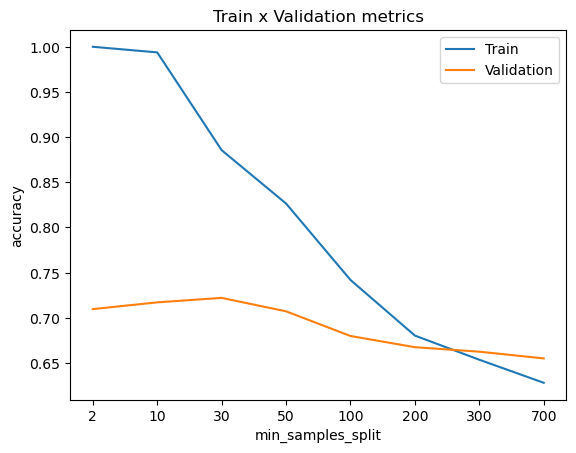

In [107]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [108]:
accuracy_list_train

[1.0,
 0.9937810945273632,
 0.8855721393034826,
 0.8264925373134329,
 0.7419154228855721,
 0.6803482587064676,
 0.6536069651741293,
 0.6281094527363185]

In [109]:
f1_list_train

[1.0,
 0.9924471299093656,
 0.8440677966101695,
 0.751115075825156,
 0.5862412761714855,
 0.43886462882096067,
 0.35903337169159955,
 0.23333333333333336]

In [110]:
accuracy_list_val

[0.7096774193548387,
 0.71712158808933,
 0.7220843672456576,
 0.707196029776675,
 0.6799007444168734,
 0.6674937965260546,
 0.6625310173697271,
 0.6550868486352357]

In [111]:
f1_list_val

[0.5063291139240507,
 0.5365853658536586,
 0.5213675213675214,
 0.4778761061946903,
 0.4,
 0.3495145631067961,
 0.29166666666666663,
 0.22346368715083798]

In [119]:
min_samples_split_list = np.arange(10,55,5)

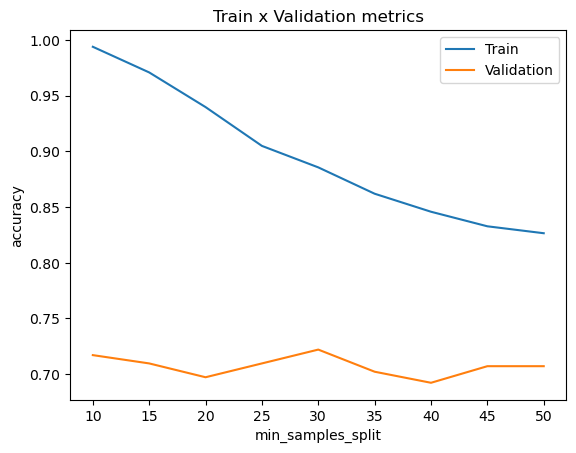

In [120]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [121]:
accuracy_list_train

[0.9937810945273632,
 0.970771144278607,
 0.9396766169154229,
 0.9048507462686567,
 0.8855721393034826,
 0.8619402985074627,
 0.845771144278607,
 0.8327114427860697,
 0.8264925373134329]

In [122]:
f1_list_train

[0.9924471299093656,
 0.9635941130906274,
 0.9225857940941741,
 0.8730290456431535,
 0.8440677966101695,
 0.8059440559440559,
 0.7820738137082601,
 0.7608888888888887,
 0.751115075825156]

In [123]:
accuracy_list_val

[0.71712158808933,
 0.7096774193548387,
 0.6972704714640199,
 0.7096774193548387,
 0.7220843672456576,
 0.7022332506203474,
 0.6923076923076923,
 0.707196029776675,
 0.707196029776675]

In [124]:
f1_list_val

[0.5365853658536586,
 0.4978540772532189,
 0.4830508474576271,
 0.5063291139240507,
 0.5213675213675214,
 0.47826086956521735,
 0.4700854700854701,
 0.4913793103448276,
 0.4778761061946903]

In [125]:
min_samples_split_list = np.arange(25,36)

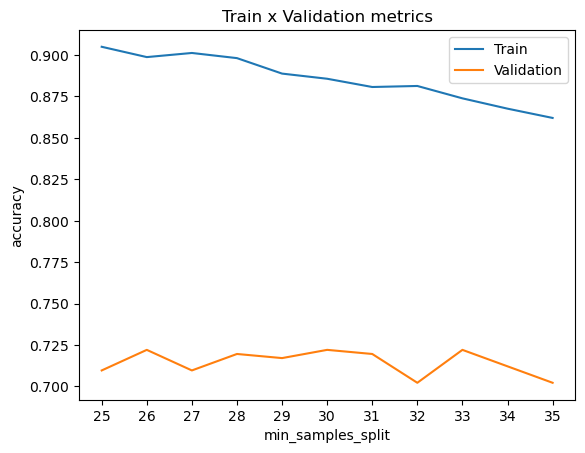

In [126]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

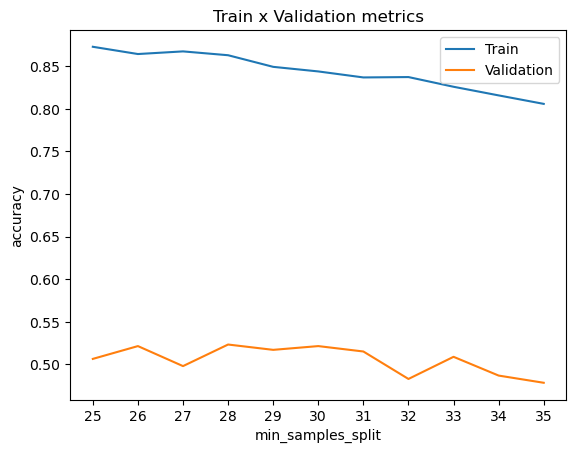

In [131]:
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Validation']);

In [132]:
accuracy_list_train

[0.9048507462686567,
 0.8986318407960199,
 0.9011194029850746,
 0.8980099502487562,
 0.888681592039801,
 0.8855721393034826,
 0.8805970149253731,
 0.8812189054726368,
 0.8737562189054726,
 0.8675373134328358,
 0.8619402985074627]

In [133]:
f1_list_train

[0.8730290456431535,
 0.8645054031587698,
 0.8676103247293921,
 0.8631051752921536,
 0.8494533221194281,
 0.8440677966101695,
 0.837011884550085,
 0.8374468085106384,
 0.8260497000856898,
 0.8159031979256698,
 0.8059440559440559]

In [134]:
accuracy_list_val

[0.7096774193548387,
 0.7220843672456576,
 0.7096774193548387,
 0.7196029776674938,
 0.71712158808933,
 0.7220843672456576,
 0.7196029776674938,
 0.7022332506203474,
 0.7220843672456576,
 0.7121588089330024,
 0.7022332506203474]

In [135]:
f1_list_val

[0.5063291139240507,
 0.5213675213675214,
 0.4978540772532189,
 0.5232067510548523,
 0.516949152542373,
 0.5213675213675214,
 0.5150214592274678,
 0.48275862068965514,
 0.5087719298245613,
 0.48672566371681425,
 0.47826086956521735]

In [136]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]

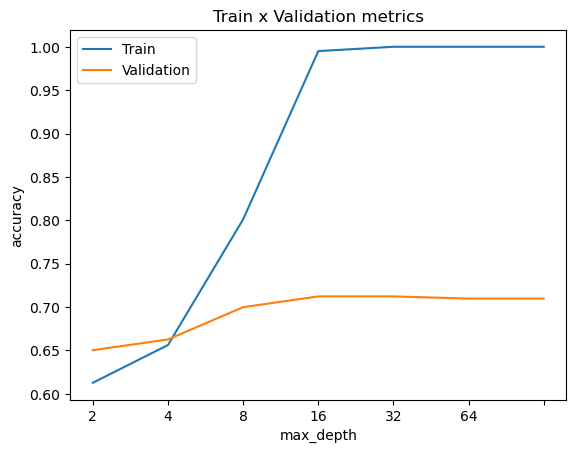

In [137]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [138]:
accuracy_list_train

[0.6125621890547264,
 0.6560945273631841,
 0.8009950248756219,
 0.9950248756218906,
 1.0,
 1.0,
 1.0]

In [139]:
f1_list_train

[0.15006821282401092,
 0.3026481715006305,
 0.683794466403162,
 0.9939485627836611,
 1.0,
 1.0,
 1.0]

In [140]:
accuracy_list_val

[0.6501240694789082,
 0.6625310173697271,
 0.6997518610421837,
 0.7121588089330024,
 0.7121588089330024,
 0.7096774193548387,
 0.7096774193548387]

In [141]:
f1_list_val

[0.12422360248447206,
 0.2,
 0.4097560975609756,
 0.5166666666666666,
 0.5084745762711864,
 0.5063291139240507,
 0.5063291139240507]

In [142]:
max_depth_list = np.arange(8,33)

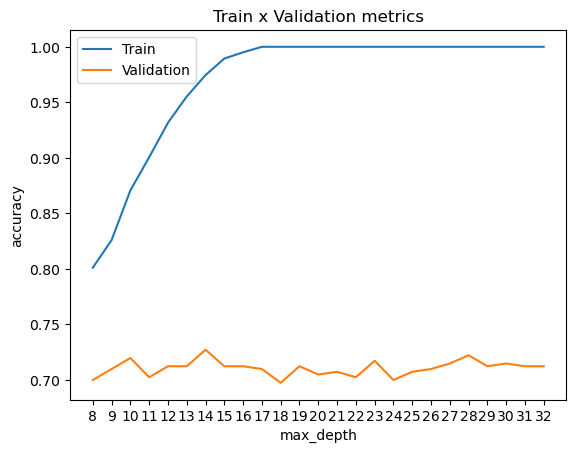

In [143]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

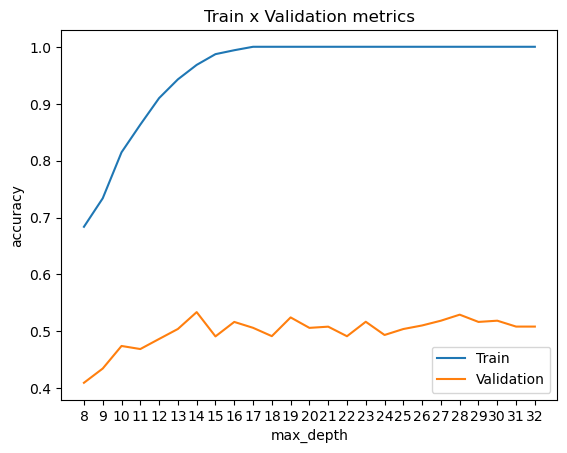

In [148]:
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(f1_list_train)
plt.plot(f1_list_val)
plt.legend(['Train','Validation']);

In [144]:
accuracy_list_train

[0.8009950248756219,
 0.8258706467661692,
 0.8706467661691543,
 0.900497512437811,
 0.931592039800995,
 0.9552238805970149,
 0.974502487562189,
 0.9894278606965174,
 0.9950248756218906,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [145]:
f1_list_train

[0.683794466403162,
 0.7338403041825096,
 0.8146167557932263,
 0.8632478632478633,
 0.9098360655737704,
 0.9427662957074723,
 0.9681923972071372,
 0.9870525514089871,
 0.9939485627836611,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [146]:
accuracy_list_val

[0.6997518610421837,
 0.7096774193548387,
 0.7196029776674938,
 0.7022332506203474,
 0.7121588089330024,
 0.7121588089330024,
 0.7270471464019851,
 0.7121588089330024,
 0.7121588089330024,
 0.7096774193548387,
 0.6972704714640199,
 0.7121588089330024,
 0.7047146401985112,
 0.707196029776675,
 0.7022332506203474,
 0.71712158808933,
 0.6997518610421837,
 0.707196029776675,
 0.7096774193548387,
 0.7146401985111662,
 0.7220843672456576,
 0.7121588089330024,
 0.7146401985111662,
 0.7121588089330024,
 0.7121588089330024]

In [147]:
f1_list_val

[0.4097560975609756,
 0.4347826086956522,
 0.4744186046511628,
 0.4690265486725664,
 0.48672566371681425,
 0.5042735042735043,
 0.5338983050847458,
 0.4912280701754387,
 0.5166666666666666,
 0.5063291139240507,
 0.4916666666666666,
 0.5245901639344263,
 0.5062240663900416,
 0.5083333333333333,
 0.4915254237288136,
 0.516949152542373,
 0.493723849372385,
 0.5042016806722688,
 0.5104602510460251,
 0.5188284518828452,
 0.5294117647058824,
 0.5166666666666666,
 0.5188284518828452,
 0.5084745762711864,
 0.5084745762711864]

In [149]:
n_estimators_list = [10,50,100,500,1000,2000]

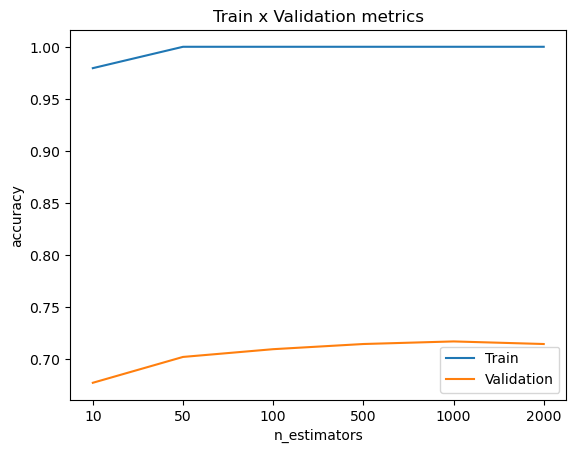

In [150]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [151]:
accuracy_list_train

[0.9794776119402985, 1.0, 1.0, 1.0, 1.0, 1.0]

In [152]:
f1_list_train

[0.9746348962336664, 1.0, 1.0, 1.0, 1.0, 1.0]

In [153]:
accuracy_list_val

[0.6774193548387096,
 0.7022332506203474,
 0.7096774193548387,
 0.7146401985111662,
 0.71712158808933,
 0.7146401985111662]

In [154]:
f1_list_val

[0.4628099173553719,
 0.49579831932773105,
 0.5063291139240507,
 0.5147679324894514,
 0.5210084033613445,
 0.5147679324894514]

In [155]:
n_estimators_list = np.arange(500,2000,100)

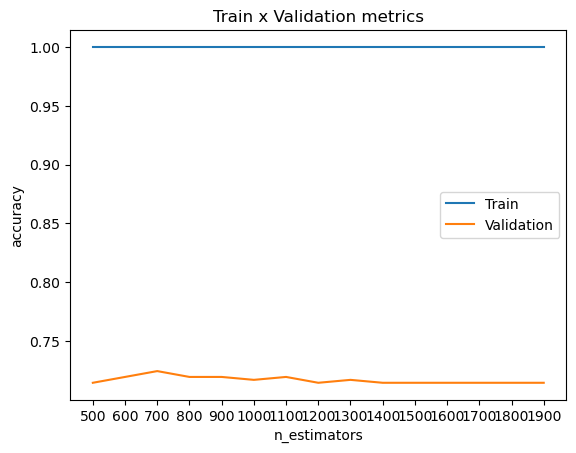

In [156]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [157]:
accuracy_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [158]:
f1_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [159]:
accuracy_list_val

[0.7146401985111662,
 0.7196029776674938,
 0.7245657568238213,
 0.7196029776674938,
 0.7196029776674938,
 0.71712158808933,
 0.7196029776674938,
 0.7146401985111662,
 0.71712158808933,
 0.7146401985111662,
 0.7146401985111662,
 0.7146401985111662,
 0.7146401985111662,
 0.7146401985111662,
 0.7146401985111662]

In [160]:
f1_list_val

[0.5147679324894514,
 0.5191489361702127,
 0.5316455696202532,
 0.5232067510548523,
 0.5232067510548523,
 0.5210084033613445,
 0.5232067510548523,
 0.5188284518828452,
 0.5210084033613445,
 0.5147679324894514,
 0.5147679324894514,
 0.5147679324894514,
 0.5147679324894514,
 0.5147679324894514,
 0.5147679324894514]

In [161]:
n_estimators_list = np.arange(650,750,10)

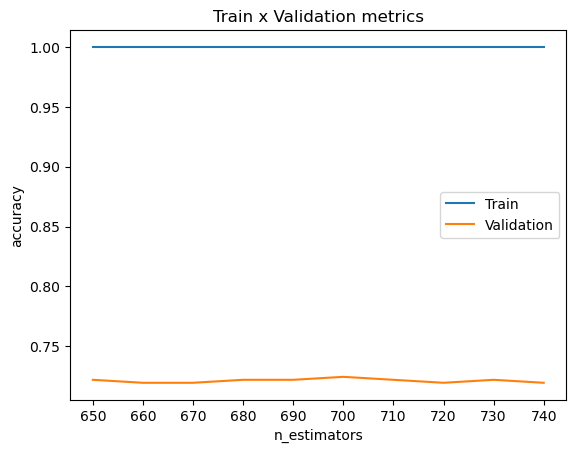

In [162]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_val = []
f1_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    f1_val = f1_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_val.append(accuracy_val)
    f1_list_val.append(f1_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation']);

In [163]:
accuracy_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [164]:
f1_list_train

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [165]:
accuracy_list_val

[0.7220843672456576,
 0.7196029776674938,
 0.7196029776674938,
 0.7220843672456576,
 0.7220843672456576,
 0.7245657568238213,
 0.7220843672456576,
 0.7196029776674938,
 0.7220843672456576,
 0.7196029776674938]

In [166]:
f1_list_val

[0.5254237288135594,
 0.5232067510548523,
 0.5232067510548523,
 0.5254237288135594,
 0.5254237288135594,
 0.5316455696202532,
 0.5254237288135594,
 0.5232067510548523,
 0.5254237288135594,
 0.5232067510548523]

    Chosen max_depth = 14
    Chosen n_estimators = 700
    Chosen min_samples_split = 26

In [167]:
random_forest_model = RandomForestClassifier(n_estimators = 700,
                                             max_depth = 14, 
                                             min_samples_split = 26).fit(X_train,y_train)

In [168]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"f1 for train:\n\tf1 score: {f1_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"Accuracy for validation:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")
print(f"f1 for validation:\n\tf1 score: {f1_score(random_forest_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 0.8669
f1 for train:
	f1 score: 0.8123
Accuracy for validation:
	Accuracy score: 0.7246
f1 for validation:
	f1 score: 0.5110


In [169]:
from xgboost import XGBClassifier

In [170]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [171]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [172]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1,random_state = 123)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.67786
[1]	validation_0-logloss:0.67046
[2]	validation_0-logloss:0.66326
[3]	validation_0-logloss:0.65562
[4]	validation_0-logloss:0.64963
[5]	validation_0-logloss:0.64179
[6]	validation_0-logloss:0.63885
[7]	validation_0-logloss:0.63344
[8]	validation_0-logloss:0.63096
[9]	validation_0-logloss:0.63126
[10]	validation_0-logloss:0.62911
[11]	validation_0-logloss:0.62722
[12]	validation_0-logloss:0.62324
[13]	validation_0-logloss:0.62222
[14]	validation_0-logloss:0.62382
[15]	validation_0-logloss:0.62088
[16]	validation_0-logloss:0.62185
[17]	validation_0-logloss:0.62139
[18]	validation_0-logloss:0.61912
[19]	validation_0-logloss:0.62051
[20]	validation_0-logloss:0.62074
[21]	validation_0-logloss:0.61924
[22]	validation_0-logloss:0.61949
[23]	validation_0-logloss:0.61835
[24]	validation_0-logloss:0.61774
[25]	validation_0-logloss:0.61828
[26]	validation_0-logloss:0.61803
[27]	validation_0-logloss:0.61752
[28]	validation_0-logloss:0.61845
[29]	validation_0-loglos

[238]	validation_0-logloss:0.71912
[239]	validation_0-logloss:0.71885
[240]	validation_0-logloss:0.72066
[241]	validation_0-logloss:0.72102
[242]	validation_0-logloss:0.72083
[243]	validation_0-logloss:0.72191
[244]	validation_0-logloss:0.72304
[245]	validation_0-logloss:0.72407
[246]	validation_0-logloss:0.72567
[247]	validation_0-logloss:0.72655
[248]	validation_0-logloss:0.72637
[249]	validation_0-logloss:0.72697
[250]	validation_0-logloss:0.72750
[251]	validation_0-logloss:0.72742
[252]	validation_0-logloss:0.72826
[253]	validation_0-logloss:0.72832
[254]	validation_0-logloss:0.72651
[255]	validation_0-logloss:0.72682
[256]	validation_0-logloss:0.72689
[257]	validation_0-logloss:0.72587
[258]	validation_0-logloss:0.72695
[259]	validation_0-logloss:0.72749
[260]	validation_0-logloss:0.72888
[261]	validation_0-logloss:0.72889
[262]	validation_0-logloss:0.72878
[263]	validation_0-logloss:0.72887
[264]	validation_0-logloss:0.72872
[265]	validation_0-logloss:0.72982
[266]	validation_0-l

[473]	validation_0-logloss:0.82346
[474]	validation_0-logloss:0.82367
[475]	validation_0-logloss:0.82454
[476]	validation_0-logloss:0.82492
[477]	validation_0-logloss:0.82543
[478]	validation_0-logloss:0.82609
[479]	validation_0-logloss:0.82646
[480]	validation_0-logloss:0.82716
[481]	validation_0-logloss:0.82809
[482]	validation_0-logloss:0.82826
[483]	validation_0-logloss:0.82960
[484]	validation_0-logloss:0.83075
[485]	validation_0-logloss:0.83098
[486]	validation_0-logloss:0.83149
[487]	validation_0-logloss:0.83169
[488]	validation_0-logloss:0.83243
[489]	validation_0-logloss:0.83355
[490]	validation_0-logloss:0.83394
[491]	validation_0-logloss:0.83515
[492]	validation_0-logloss:0.83570
[493]	validation_0-logloss:0.83696
[494]	validation_0-logloss:0.83877
[495]	validation_0-logloss:0.83903
[496]	validation_0-logloss:0.83987
[497]	validation_0-logloss:0.83988
[498]	validation_0-logloss:0.83990
[499]	validation_0-logloss:0.84044


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [173]:
xgb_model.best_iteration

499

In [176]:
print(f"Accuracy for train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nAccuracy for test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")
print(f"f1 for train:\n\tAccuracy score: {f1_score(xgb_model.predict(X_train),y_train):.4f}\nf1 for test:\n\tAccuracy score: {f1_score(xgb_model.predict(X_val),y_val):.4f}")

Accuracy for train:
	Accuracy score: 0.9210
Accuracy for test:
	Accuracy score: 0.6824
f1 for train:
	Accuracy score: 0.9036
f1 for test:
	Accuracy score: 0.5294
